#    Forcasting Model Based Methods Cocacola dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


###   Converting Q1,Q2,Q3,Q4 to dates

In [4]:
dates = pd.date_range(start='1986', periods=42, freq='Q')
dates

DatetimeIndex(['1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [5]:
cocacola['date'] = pd.DataFrame(dates)
cocacola

,Quarter,Sales,date
0,Q1_86,1734.827000,1986-03-31
1,Q2_86,2244.960999,1986-06-30
2,Q3_86,2533.804993,1986-09-30
3,Q4_86,2154.962997,1986-12-31
4,Q1_87,1547.818996,1987-03-31
5,Q2_87,2104.411995,1987-06-30
6,Q3_87,2014.362999,1987-09-30
7,Q4_87,1991.746998,1987-12-31
8,Q1_88,1869.049999,1988-03-31
9,Q2_88,2313.631996,1988-06-30


In [6]:
coca_cola = cocacola.drop(["Quarter"],axis=1)

In [7]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Sales   42 non-null     float64       
 1   date    42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


###    Extracting Year and Month

In [8]:
coca_cola["year"] = coca_cola.date.dt.strftime("%Y")
coca_cola["month"] = coca_cola.date.dt.strftime("%b")
coca_cola.head()

,Sales,date,year,month
0,1734.827000,1986-03-31,1986,Mar
1,2244.960999,1986-06-30,1986,Jun
2,2533.804993,1986-09-30,1986,Sep
3,2154.962997,1986-12-31,1986,Dec
4,1547.818996,1987-03-31,1987,Mar


##     Visualizing the Dataset

###     1) Line Plot

<AxesSubplot:>

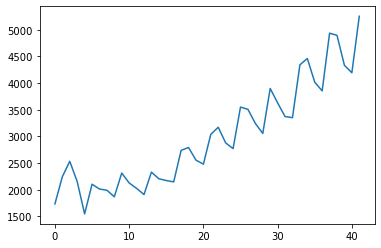

In [9]:
coca_cola.Sales.plot()

<AxesSubplot:xlabel='year', ylabel='Sales'>

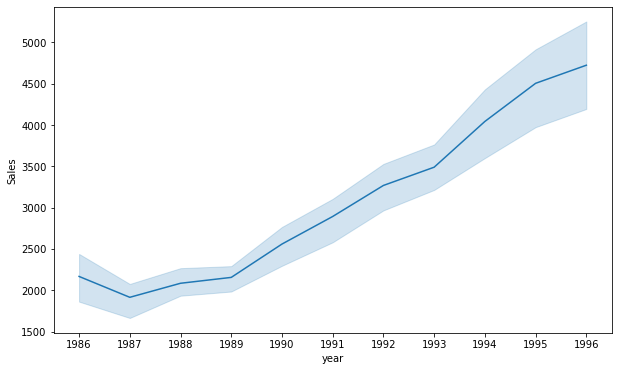

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(x="year",y="Sales",data=coca_cola)

###      2) Histogram

<AxesSubplot:>

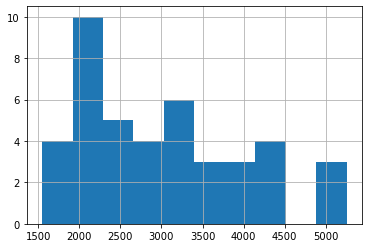

In [11]:
coca_cola.Sales.hist()

###      3)  Density Plot

<AxesSubplot:ylabel='Density'>

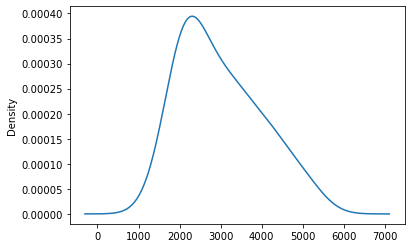

In [12]:
coca_cola.Sales.plot(kind='kde')

###     4)   Box Plot

<AxesSubplot:xlabel='year', ylabel='Sales'>

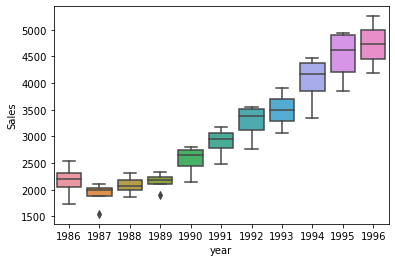

In [13]:
sns.boxplot(y="Sales",x="year",data=coca_cola)

###     5)   Lag Plot 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

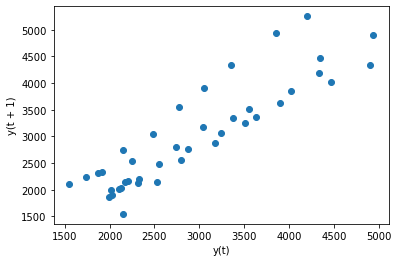

In [14]:
lag_plot(coca_cola["Sales"])

###      6)   Autocorrelation Plot

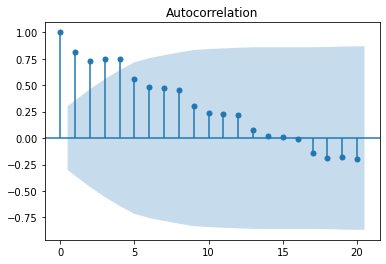

In [15]:
plot_acf(coca_cola["Sales"],lags=20)
pyplot.show()

###      7)  Partial Autocorrelation Plot

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


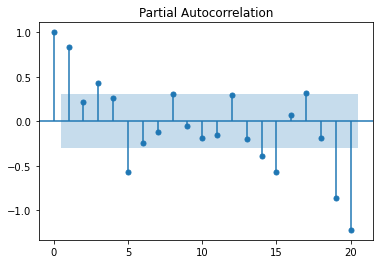

In [16]:
plot_pacf(coca_cola["Sales"],lags=20)
pyplot.show()

###     8)  Heat Map

<AxesSubplot:xlabel='month', ylabel='year'>

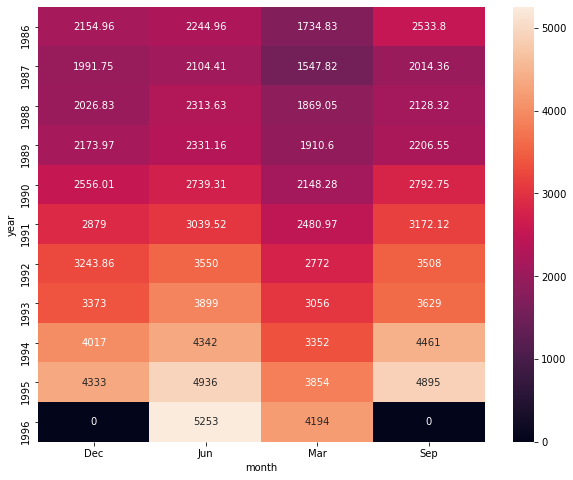

In [17]:
plt.figure(figsize=(10,8))
heatmap_y_month = pd.pivot_table(data=coca_cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

###     9)  Time series decomposition plot

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-19-7d2243841c0c>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(coca_cola.Sales,freq=9)


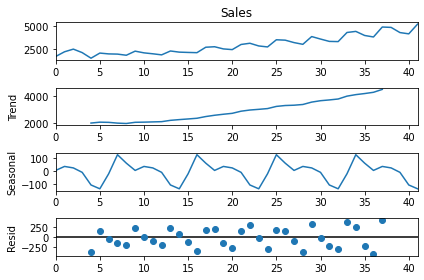

In [19]:
decompose_ts_add = seasonal_decompose(coca_cola.Sales,freq=9)
decompose_ts_add.plot()
plt.show() 

###    Preprocessing

###    Creating dummy variables, t and t square

In [20]:
Dummies = pd.DataFrame(pd.get_dummies(coca_cola['month']))
coca_cola = pd.concat([coca_cola,Dummies],axis = 1)
coca_cola.head()

,Sales,date,year,month,Dec,Jun,Mar,Sep
0,1734.827000,1986-03-31,1986,Mar,0,0,1,0
1,2244.960999,1986-06-30,1986,Jun,0,1,0,0
2,2533.804993,1986-09-30,1986,Sep,0,0,0,1
3,2154.962997,1986-12-31,1986,Dec,1,0,0,0
4,1547.818996,1987-03-31,1987,Mar,0,0,1,0


In [21]:
coca_cola["t"] = np.arange(1,43)
coca_cola["t_square"] = coca_cola["t"] * coca_cola["t"]
coca_cola["log_Sales"] = np.log(coca_cola.Sales)
coca_cola.head()

,Sales,date,year,month,Dec,Jun,Mar,Sep,t,t_square,log_Sales
0,1734.827000,1986-03-31,1986,Mar,0,0,1,0,1,1,7.458663
1,2244.960999,1986-06-30,1986,Jun,0,1,0,0,2,4,7.716443
2,2533.804993,1986-09-30,1986,Sep,0,0,0,1,3,9,7.837477
3,2154.962997,1986-12-31,1986,Dec,1,0,0,0,4,16,7.675529
4,1547.818996,1987-03-31,1987,Mar,0,0,1,0,5,25,7.344602


###     Splitting Dataset

In [22]:
train = coca_cola.head(36)
test = coca_cola.tail(6)

##    Forecasting Model Based Method

###    1)  Linear Model 

In [23]:
import statsmodels.formula.api as smf 

In [24]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

667.4256979280378

###    2) Exponential Model

In [25]:
exponential_model = smf.ols('log_Sales~t',data=train).fit()
pred_exponential = pd.Series(exponential_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exponential)))**2))
rmse_exponential 

526.7672615478209

###    3)  Quadratic Model 

In [26]:
quadratic_model = smf.ols('Sales~t+t_square',data=train).fit()
pred_quadratic = pd.Series(quadratic_model.predict(test[["t","t_square"]]))
rmse_quadratic = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quadratic))**2))
rmse_quadratic 

485.1406702070184

###    4)  Additive Seasonality 

In [27]:
additive_season = smf.ols('Sales ~ Mar + Jun + Sep + Dec',data=train).fit()
pred_add_season = pd.Series(additive_season.predict(test[['Mar','Jun','Sep','Dec']]))
rmse_add_season = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_season))**2))
rmse_add_season 

1895.5593132150466

###   5)  Additive Seasonality Quadratic 

In [28]:
additive_quadratic = smf.ols('Sales ~ t + t_square + Mar + Jun + Sep + Dec',data=train).fit()
pred_add_quadratic = pd.Series(additive_quadratic.predict(test[['t','t_square','Mar','Jun','Sep','Dec']]))
rmse_add_quadratic = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_quadratic))**2))
rmse_add_quadratic 

283.0619605703901

###   6)  Multiplicative Seasonality

In [29]:
multiple_season = smf.ols('log_Sales ~ t + t_square + Mar + Jun + Sep + Dec',data = train).fit()
pred_multiple_season = pd.Series(multiple_season.predict(test))
rmse_multiple_season = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multiple_season)))**2))
rmse_multiple_season 

602.5095425116263

###   7) Multiplicative Additive Seasonality 

In [30]:
multiple_additive = smf.ols('log_Sales ~ t + Mar + Jun + Sep + Dec',data = train).fit()
pred_multiple_additive = pd.Series(multiple_additive.predict(test))
rmse_multiple_additive = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multiple_additive)))**2))
rmse_multiple_additive 

323.21275367144693

###    Compare the Results 

In [31]:
table = {"MODEL":pd.Series(["rmse_linear","rmse_exponential","rmse_quadratic","rmse_add_season","rmse_add_quadratic","rmse_multiple_season","rmse_multiple_additive"]),
         "RMSE_Values":pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_add_season,rmse_add_quadratic,rmse_multiple_season,rmse_multiple_additive])}
table_rmse=pd.DataFrame(table)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
4,rmse_add_quadratic,283.061961
6,rmse_multiple_additive,323.212754
2,rmse_quadratic,485.140670
1,rmse_exponential,526.767262
5,rmse_multiple_season,602.509543
0,rmse_linear,667.425698
3,rmse_add_season,1895.559313


###    Additive Quadratic Seasonality Model gives the best prediction of least RMSE of 283.0619